# What impact do Oliver's Four Factors have on a basketball team's success?

In an attempt to determine the most important attributes needed for a basketball team to win games, Dean Oliver identified what he called the "Four Factors of Basketball Success." In order of importance (or relative weight), those factors are:

- Shooting (40%)
- Turnovers (25%)
- Rebounding (20%)
- Free Throws (15%)

These factors can be applied to a team's offense and defense, so we actually have eight factors that can determine a team's success. The specific stats we'll be looking at are:

- **Offensive Factors**
    - Effective Field Goal Percentage: This is a scale corrected measure to account for 3 point shots. Since 3 pointers are more difficult and are worth more, they are given greater weight than 2 point shots.</br>

        $$\mathrm{eFG}\% = \frac{\mathrm{FGM}+0.5*3\mathrm{PM}}{\mathrm{FGA}}$$
        Where FGM is the number of field goals made, 3PM is the number of 3 pointers made, and FGA is the number of field goals attempted.
    
    - Turnover Percentage: This is the percentage of possessions that ended without a field goal attempt or a free throw attempt.
        $$\mathrm{TO}\% = \frac{\mathrm{Number\, of\, possessions\, ending\, in\, a\, TO}}{\mathrm{Total\, number\, of\, possessions}}$$
        
    - Offensive Rebound Percentage: This is the number of offensive rebounds divided by the number of available *rebounds* after a missed field goal attempt.
        $$\mathrm{OREB}\% = \frac{\mathrm{teamOREB}}{\mathrm{teamOREB + opptDREB}}$$
        Where teamOREB is the number of offensive rebounds and opptDREB is the number of defensive rebounds of the opponent.
        
    - Free Throw Rate: This is the number of free throws made per field goal attempt.
        $$\mathrm{FTR} = \frac{\mathrm{FTM}}{\mathrm{FGA}}$$
- **Defensive Factors**
    - Opponent's Effective Field Goal Percentage
    - Opponent's Turnover Percentage
    - Opponent's Free Throw Rate
    
    These three factors are computed the same as the offensive factors, but using the opponents stats. For defensive rebounds we instead calulate the team's number of defensive rebounds per number of the opponent's field goal misses that are available for rebound. 
    - Defensive Rebound Percentage:
        $$\mathrm{DREB}\% = \frac{\mathrm{teamDREB}}{\mathrm{teamDREB + opptOREB}}$$


## Our Goal

We wish to determine if the relative importance of each factor (eFG%, TO%, OREB%, and FTR) actually follows Oliver's breakdown of 40/25/20/15. 

Using the 2016-2017 NBA Team Box Stats obtained from [Kaggle](https://www.kaggle.com/pablote/nba-enhanced-stats), let's see if the data follows Oliver's breakdown to predict the number of wins a team amasses during the regular season.

We'll use a Random Forest and Linear Regression to model the data.

## Imports

`autoreload` commands will automatically modify the notebook when the source code is updated. Thus, using `ext_autoreload` will automatically and dynamically make the changes in your notebook.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import structured

from imports import *

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Looking at the Data

In [4]:
# Display the entire data frame up to 1000 rows and columns.
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
df = pd.read_csv('data/2016-17_teamBoxScore.csv', parse_dates=['gmDate'])

In [6]:
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


In [7]:
df.shape

(2460, 123)

In [8]:
df.tail().T

,2455,2456,2457,2458,2459
gmDate,2017-04-12 00:00:00,2017-04-12 00:00:00,2017-04-12 00:00:00,2017-04-12 00:00:00,2017-04-12 00:00:00
gmTime,10:30,10:30,10:30,10:30,10:30
seasTyp,Regular,Regular,Regular,Regular,Regular
offLNm1,Williams,Lane,Lane,Guthrie,Guthrie
offFNm1,James,Karl,Karl,David,David
offLNm2,Garretson,Wall,Wall,Adams,Adams
offFNm2,Ron,Scott,Scott,Bennie,Bennie
offLNm3,Ayotte,Spooner,Spooner,Davis,Davis
offFNm3,Mark,Bill,Bill,Marc,Marc
teamAbbr,GS,SAC,LAC,NO,POR


In [9]:
# Check for missing values and get the ratio of the 
# missing values to the number of training sets.
for feature in df.columns:
    if df[feature].isnull().sum()/len(df) != 0:
        print(df[feature].isnull().sum()/len(df))

In [10]:
# Convert categoricals to number IDs.
structured.train_cats(df)

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [11]:
df.teamRslt = df.teamRslt.cat.codes

In [12]:
# We can look at the category names in the offLNm1 column/feature.
df.offLNm1.cat.categories

Index(['Adams', 'Anderson', 'Barnaky', 'Blair', 'Brothers', 'Brown', 'Buchert',
       'Callahan', 'Collins', 'Corbin', 'Crawford', 'Cutler', 'Dalen', 'Davis',
       'Ervin', 'Fitzgerald', 'Ford', 'Forte', 'Foster', 'Fraher', 'Garretson',
       'Goble', 'Goldenberg', 'Guthrie', 'Holtkamp', 'Kennedy', 'Kirkland',
       'Kogut', 'Lane', 'Lindsay', 'Maddox', 'Mauer', 'Mott', 'Nansel', 'Orr',
       'Petraitis', 'Richardson', 'Scott', 'Smith', 'Taylor', 'Tiven',
       'Twardoski', 'VanDuyne', 'Voyard-Tadal', 'Wall', 'Washington',
       'Williams', 'Wood', 'Workman', 'Wright', 'Zielinski'],
      dtype='object')

In [13]:
# Compute the team's free throw rate and add it as a column.
df['teamFTR'] = df.teamFTM / df.teamFGA
df['opptFTR'] = df.opptFTM / df.opptFGA

In [14]:
# Extract just the 8 Basic Box Score stats, the team identifiers, and the target values (teamRslt).
basic8DF = df[['teamAbbr', 'teamRslt',
               'teamEFG%', 'teamTO%', 'teamOREB%', 'teamFTR',
               'opptEFG%', 'opptTO%', 'opptOREB%', 'opptFTR']]

In [15]:
# Make a list of the stats we want to average.
statList = basic8DF.columns[2:]

# Group the rows by teams and find the average for each stat for each team.
# This average includes data from both wins and losses.
statAves = basic8DF.groupby('teamAbbr')[statList].mean()

In [16]:
# Columns which are already decimal percentages.
statAvesDec = statAves[['teamFTR', 'teamEFG%', 'opptEFG%', 'opptFTR']]

# Columns which need to be converted to decimal percentages.
statAvesConvert = statAves[['teamTO%','teamOREB%','opptTO%','opptOREB%']]/100.

# Get just want the rows for a winning result and then sum the wins by team.
w = basic8DF[basic8DF.teamRslt==1]
winTotals = w.groupby('teamAbbr')[['teamRslt']].sum()

# Now merge the average stats and the win total using the team name.
mergedDF = statAvesDec.merge(statAvesConvert, how='inner', on=['teamAbbr'])
mergedDF = mergedDF.merge(winTotals, how='inner', on=['teamAbbr'])

In [17]:
mergedDF

,teamFTR,teamEFG%,opptEFG%,opptFTR,teamTO%,teamOREB%,opptTO%,opptOREB%,teamRslt
teamAbbr,,,,,,,,,
ATL,0.217000,0.505240,0.507957,0.180037,0.142272,0.235396,0.137930,0.240072,43
BKN,0.230843,0.508663,0.515204,0.214566,0.147008,0.192209,0.115951,0.230145,20
BOS,0.221758,0.525883,0.504193,0.225557,0.122008,0.209825,0.125652,0.239419,53
CHA,0.229385,0.502128,0.525907,0.165161,0.106717,0.197006,0.121661,0.198864,36
CHI,0.208586,0.488185,0.508415,0.170680,0.122448,0.267708,0.123856,0.237333,41
CLE,0.207071,0.547373,0.517079,0.175791,0.125599,0.219657,0.114390,0.248972,51
DAL,0.182505,0.505720,0.531076,0.220635,0.115804,0.180479,0.144384,0.195655,33
DEN,0.217532,0.531662,0.533255,0.195645,0.131696,0.270975,0.109208,0.230662,40
DET,0.158616,0.492338,0.518645,0.198992,0.109182,0.241287,0.120939,0.185731,37


Save the merged data frame. Apparently it's a good idea to save this in a temporary folder.

In [18]:
mergedDF = mergedDF.reset_index()
os.makedirs('tmp',exist_ok=True)
mergedDF.to_feather('tmp/basic8DF')

If in future, we want to start with our modified data frame, we can load the saved DF using `feather`.

In [19]:
mergedDF = pd.read_feather('tmp/basic8DF')
mergedDF = mergedDF.sort_values(['teamRslt'],ascending=True)

In [20]:
# Split the target values and the features' values.
y = mergedDF['teamRslt'].values

df = mergedDF[statList]

In [21]:
# Fit the data using a Random Forest.
m = RandomForestRegressor(n_estimators=50, oob_score=True, n_jobs=-1) # Run on all available cores.
m.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

## Feature Importance in RandomForestRegressor

scikit-learn uses the "gini importance" to determine the relative importance of predictors. This is defined as the total decrease in node impurity averaged over all trees of the ensemble. The node impurity decrease is weighted by the probability of reaching that node, and the probability is approximated by the number of samples reaching that node.

Computing the feature importance values of a single tree is as follows:
- Initialize an array feature importances of all zeros with size *n_features*.
- Traverse the tree:
    - For each internal node that splits on feature *i*, compute the error reduction of that node and multiply by the number of samples that were routed to the node.
    - Add this quantity to feature_importances.

The error reduction is the impurity of the set of examples that gets routed to the internal node minus the sum of the impurities of the two partitions created by the split.

           importance
feature              
teamEFG%        0.527
opptEFG%        0.232
teamTO%         0.073
teamFTR         0.053
teamOREB%       0.032
opptTO%         0.029
opptFTR         0.028
opptOREB%       0.026


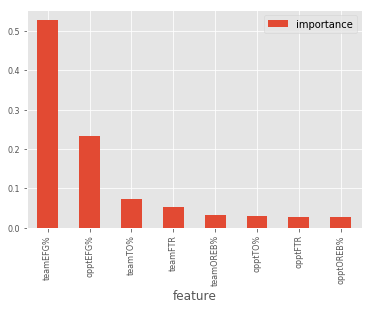

In [23]:
factors = ['teamEFG%', 'teamTO%', 'teamFTR', 'teamOREB%']

imp = pd.DataFrame({'feature': df.columns, 'importance': np.round(m.feature_importances_,3)})
imp = imp.sort_values('importance', ascending=False).set_index('feature')
print(imp)
imp.plot.bar()

Let's make a data frame of the features and their importances.

In [24]:
imp2 = pd.DataFrame({'feature': df.columns, 'importance': np.round(m.feature_importances_,3)})

In [25]:
imp2

,feature,importance
0,teamEFG%,0.527
1,teamTO%,0.073
2,teamOREB%,0.032
3,teamFTR,0.053
4,opptEFG%,0.232
5,opptTO%,0.029
6,opptOREB%,0.026
7,opptFTR,0.028


Now we compute the relative importance of Oliver's Four Factors.

In [26]:
for ii in range(len(imp2[0:4])):
    impRatio =  imp2['importance'][ii] / imp2[0:4]['importance'].sum()
    print(imp2['feature'][ii], impRatio)

teamEFG% 0.7693430656934306
teamTO% 0.10656934306569342
teamOREB% 0.04671532846715328
teamFTR 0.07737226277372262


We see that eFG%, TO%, OREB%, and FTR relative importances are 77/11/5/8. Quite a bit different from Oliver's 40/25/20/15. 

## Predicting Total Wins via RF
Let's see how well our Random Forest predicts a team's total number of wins for the regular season.

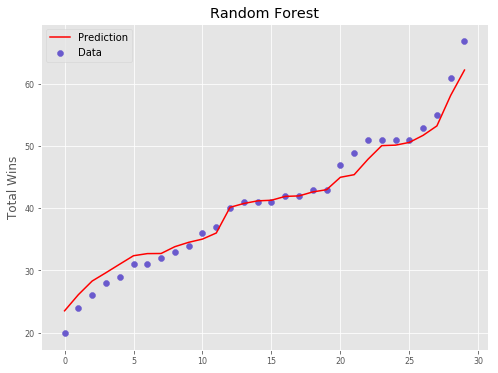

In [27]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(range(len(y)), np.sort(m.predict(df)), color='red',label='Prediction')
ax.scatter(range(len(y)), np.sort(y), color='slateblue', label='Data')

ax.legend(loc=2)
ax.set_title('Random Forest')
ax.set_ylabel('Total Wins')

plt.show()

In [28]:
def rmse(x,y): 
    """Check the RMSE value."""
    return math.sqrt(((x-y)**2).mean())

In [29]:
print(f'RMSE: {rmse(m.predict(df),y)}')
print(f'R^2: {m.score(df,y)}')

RMSE: 2.5916352624035146
R^2: 0.944491129476584


Well, our R^2 isn't bad. We see however that the model consistently overpredicts at the lower end of the total number of wins and underpredicts at the higher end.

# Linear Regression

## Feature Importance
Let's see what linear regression can tell us about feature importance.

In [30]:
X = df.values

In [31]:
# Initialize the model.
reg = LinearRegression(fit_intercept=True)
# Fit the data.
reg = reg.fit(X,y)
# Get the predictions.
yPred = reg.predict(X)

In [32]:
reg.coef_, reg.intercept_

(array([ 414.36531, -284.65441,  147.50614,   45.94811, -408.7184 ,  349.55267, -112.76893,  -72.00614]),
 27.280535158831597)

Our linear coefficients look promising in that they trend in the correct directions. That is, positive stats such as EFG% have a positive value (+414) and negative stats such as TO% are negative (-285).

Let's see what the relative importances are for Oliver's Four Factors.

In [33]:
for ii in range(0,4):
    weight = (abs(reg.coef_[ii])/np.sum(abs(reg.coef_[0:4])))
    print(factors[ii], weight)

teamEFG% 0.4642883968632792
teamTO% 0.3189498221918755
teamFTR 0.16527780566556868
teamOREB% 0.051483975279276596


We see that the relative feature importances are quite different from those we saw in our Random Forest model. Shooting and turnovers seem to be more significant (46% and 32%, respectively) than Oliver's breakdown of 40% and 25%. Free throw rate importance (17%) is more consistent to Oliver's importance of 15%. However, we see that importance of rebounding (Oliver gives a 20% importance) is significantly inflated (we compute a 5% importance for offensive rebounds).

## Predicting Total Wins via LR

How well does our linear regression model predict a team's total number of regular season wins?

In [34]:
def linEq(x,y):
    return (y[0]*x[0] + y[1]*x[1] + y[2]*x[2] + y[3]*x[3]
            + y[4]*x[4] + y[5]*x[5] + y[6]*x[6] + y[7]*x[7])
yPred = []
for ii in range(len(X)):
    yPred.append(reg.intercept_+linEq(X[ii],reg.coef_))

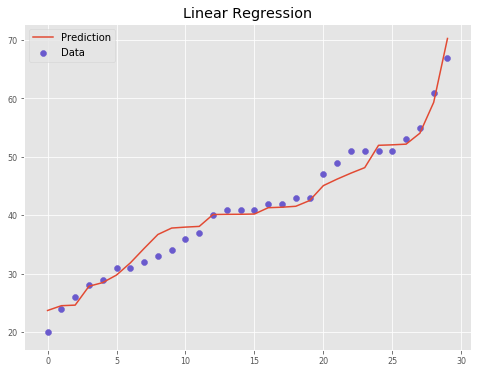

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

xArr = range(0,len(y))
ax.plot(xArr, np.sort(yPred),label='Prediction')
ax.scatter(xArr, np.sort(y), color='slateblue',label='Data')

ax.legend(loc=2)
ax.set_title('Linear Regression')

plt.show()

In [36]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(y, yPred))
r2 = reg.score(X, y)

rmse, r2

(3.123505777842332, 0.9193695178164095)

Hm, both our RMSE and R^2 have gotten worse, albeit not dratistically worse. However, we see an improvement in predicted wins at both the lower and higher end compared to our Random Forest Model. Not too shabby.

# Conclusions

Using a basketball team's offensive stats, we have quantified the impact of possession completion for winning. The relative importance results from Random Forest and Linear Regression analysis are significantly different quantitatively. Qualitatively however, the order of importance for the four factors are the same. E.g., in order from most important to least important is effective field goal percentage, turnover percentage, free throw rate, and offensive rebound percentage.

Knowing the relative importance of shooting, rebounding, scoring, and ball handling can be extremely useful for building/improving a team. If a coach can identify a team's weaknesses, then he can draft players with the necessary talents to win games.